<a href="https://colab.research.google.com/github/Htets-Corner/SYNTHBUSTER_RAISE-1k/blob/main/syn_real_balance_mobilevit050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import shutil
import random
from tqdm import tqdm
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
ai_root = "/content/drive/MyDrive/synthbuster_subset"   # Source: your sampled AI images
dataset_root = "/content/drive/MyDrive/synthbuster"     # Destination structured dataset
train_dir = os.path.join(dataset_root, "train", "ai")
test_dir = os.path.join(dataset_root, "test", "ai")

# Create train/test dirs
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through each subfolder in AI root
ai_folders = [f for f in os.listdir(ai_root) if os.path.isdir(os.path.join(ai_root, f))]

for folder in ai_folders:
    folder_path = os.path.join(ai_root, folder)

    # Take only PNG files
    imgs = [f for f in os.listdir(folder_path) if f.lower().endswith(".png")]
    imgs.sort()  # keep consistent order
    random.shuffle(imgs)  # shuffle to avoid bias

    # Split 80/20
    split_idx = int(0.8 * len(imgs))
    train_imgs, test_imgs = imgs[:split_idx], imgs[split_idx:]

    # Copy train images
    for img in tqdm(train_imgs, desc=f"Copying Train {folder}"):
        src = os.path.join(folder_path, img)
        new_name = f"{folder}_{img}"   # keep folder prefix to avoid name clashes
        dst = os.path.join(train_dir, new_name)
        if not os.path.exists(dst):
            shutil.copy(src, dst)

    # Copy test images
    for img in tqdm(test_imgs, desc=f"Copying Test {folder}"):
        src = os.path.join(folder_path, img)
        new_name = f"{folder}_{img}"
        dst = os.path.join(test_dir, new_name)
        if not os.path.exists(dst):
            shutil.copy(src, dst)

    print(f"✅ {folder}: Train={len(train_imgs)}, Test={len(test_imgs)}")

print("🎯 Finished splitting synthbuster_subset into train/test")
print(f"Train folder -> {train_dir}")
print(f"Test folder  -> {test_dir}")


Mounted at /content/drive


Copying Test dalle2: 100%|██████████| 20/20 [00:01<00:00, 13.00it/s]


✅ dalle2: Train=80, Test=20


Copying Test dalle3: 100%|██████████| 20/20 [00:00<00:00, 37.80it/s]


✅ dalle3: Train=80, Test=20


Copying Test firefly: 100%|██████████| 20/20 [00:00<00:00, 65.21it/s]


✅ firefly: Train=80, Test=20


Copying Test glide: 100%|██████████| 20/20 [00:00<00:00, 62.52it/s]


✅ glide: Train=80, Test=20


Copying Test midjourney-v5: 100%|██████████| 20/20 [00:01<00:00, 11.85it/s]


✅ midjourney-v5: Train=80, Test=20


Copying Test stable-diffusion-1-3: 100%|██████████| 20/20 [00:01<00:00, 13.62it/s]


✅ stable-diffusion-1-3: Train=80, Test=20


Copying Test stable-diffusion-1-4: 100%|██████████| 20/20 [00:01<00:00, 13.25it/s]


✅ stable-diffusion-1-4: Train=80, Test=20


Copying Test stable-diffusion-2: 100%|██████████| 20/20 [00:03<00:00,  5.54it/s]


✅ stable-diffusion-2: Train=80, Test=20


Copying Test stable-diffusion-xl: 100%|██████████| 40/40 [00:00<00:00, 55.72it/s]

✅ stable-diffusion-xl: Train=160, Test=40
🎯 Finished splitting synthbuster_subset into train/test
Train folder -> /content/drive/MyDrive/synthbuster/train/ai
Test folder  -> /content/drive/MyDrive/synthbuster/test/ai


In [3]:
import os

train_ai_dir = "/content/drive/MyDrive/synthbuster/train/real"
test_ai_dir = "/content/drive/MyDrive/synthbuster/test/real"

# Count PNG files in train and test
train_ai_count = len([f for f in os.listdir(train_ai_dir) if f.lower().endswith(".png")])
test_ai_count = len([f for f in os.listdir(test_ai_dir) if f.lower().endswith(".png")])

print(f"Train AI images: {train_ai_count}")
print(f"Test AI images: {test_ai_count}")
print(f"Total AI images: {train_ai_count + test_ai_count}")



Train AI images: 799
Test AI images: 200
Total AI images: 999


In [5]:
# Step 0: Data Preparation

# 1. Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# 2. Define dataset path
import os

# Update this path if needed
dataset_path = "/content/drive/MyDrive/synthbuster"

train_dir = os.path.join(dataset_path, "train")
test_dir  = os.path.join(dataset_path, "test")

print("Train path:", train_dir)
print("Test path:", test_dir)

# 3. Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 4. Define image transformations (resize, normalization)
# MobileViT usually works with 256x256 or 224x224 input
image_size = 256

transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],   # normalize to [-1, 1]
        std=[0.5, 0.5, 0.5]
    )
])

# 5. Load train and test datasets
#train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
#test_dataset  = datasets.ImageFolder(root=test_dir, transform=transform)

from torchvision.datasets import ImageFolder

valid_exts = ('.jpg', '.jpeg', '.png', '.PNG', '.bmp', '.tif', '.tiff', '.webp')

train_dataset = ImageFolder(
    root=train_dir,
    transform=transform,
    is_valid_file=lambda path: path.lower().endswith(valid_exts)
)

test_dataset = ImageFolder(
    root=test_dir,
    transform=transform,
    is_valid_file=lambda path: path.lower().endswith(valid_exts)
)


# 6. Create DataLoaders
batch_size = 32
#batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# 7. Check class labels
classes = train_dataset.classes
print("Classes:", classes)
print("Train size:", len(train_dataset))
print("Test size:", len(test_dataset))

Train path: /content/drive/MyDrive/synthbuster/train
Test path: /content/drive/MyDrive/synthbuster/test
Classes: ['ai', 'real']
Train size: 1599
Test size: 400


In [6]:
# Colab cell 3: load model from timm and adapt classifier
import timm
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

model_name = "mobilevitv2_050"   # you can change to other mobilevit variants available in timm
model = timm.create_model(model_name, pretrained=True)

# adapt head to match num classes
num_classes = len(train_dataset.classes)
try:
    model.reset_classifier(num_classes=num_classes)
except Exception:
    # fallback: try to locate classifier attribute
    if hasattr(model, "classifier"):
        in_features = model.classifier.in_features
        model.classifier = nn.Linear(in_features, num_classes)
    elif hasattr(model, "head"):
        in_features = model.head.in_features
        model.head = nn.Linear(in_features, num_classes)
    else:
        raise RuntimeError("Cannot find classifier head to replace automatically. Inspect model structure.")

model = model.to(device)
print(f"Loaded {model_name} -> classifier set to {num_classes} classes")


Device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/5.54M [00:00<?, ?B/s]

Loaded mobilevitv2_050 -> classifier set to 2 classes


In [7]:
# Colab cell 4: training loop + checkpointing + history saving
import torch, os, copy
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import f1_score, balanced_accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paths to save stuff in Drive
save_dir = "/content/drive/MyDrive/synthbuster/checkpoints"
os.makedirs(save_dir, exist_ok=True)
best_model_path = os.path.join(save_dir, "mobilevitv2_best.pth")
last_checkpoint_path = os.path.join(save_dir, "mobilevitv2_last.pth")
history_path = os.path.join(save_dir, "history.pth")
csv_log_path = os.path.join(save_dir, "training_log.csv")

# Training settings
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)
num_epochs = 10
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=max(1, num_epochs))
scaler = torch.cuda.amp.GradScaler() if torch.cuda.is_available() else None

# resume if checkpoint exists
start_epoch = 0
best_val_acc = 0.0
history = {"epoch":[], "train_loss":[], "train_acc":[], "val_loss":[], "val_acc":[], "val_macro_f1":[], "val_bal_acc":[]}
best_model_wts = copy.deepcopy(model.state_dict())

if os.path.exists(last_checkpoint_path):
    print("Resuming from checkpoint:", last_checkpoint_path)
    ckpt = torch.load(last_checkpoint_path, map_location=device)
    model.load_state_dict(ckpt['model_state'])
    optimizer.load_state_dict(ckpt['optimizer_state'])
    history = ckpt.get('history', history)
    start_epoch = ckpt.get('epoch', 0)
    best_val_acc = ckpt.get('best_val_acc', 0.0)
    print(f"Resumed at epoch {start_epoch}, best_val_acc {best_val_acc:.4f}")

for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]")
    for images, labels in loop:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        if scaler is not None:
            with torch.cuda.amp.autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += images.size(0)
        loop.set_postfix(loss=running_loss/total, acc=100*correct/total)

    train_loss = running_loss / len(train_loader.dataset)
    train_acc  = 100. * correct / total

    # validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device); labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += images.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_loss = val_loss / len(val_loader.dataset)
    val_acc  = 100. * val_correct / val_total
    val_macro_f1 = f1_score(all_labels, all_preds, average="macro")
    val_bal_acc  = balanced_accuracy_score(all_labels, all_preds)

    # record history
    history["epoch"].append(epoch+1)
    history["train_loss"].append(train_loss)
    history["train_acc"].append(train_acc)
    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)
    history["val_macro_f1"].append(val_macro_f1)
    history["val_bal_acc"].append(val_bal_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f} Val Acc: {val_acc:.2f}% | Macro-F1: {val_macro_f1:.4f} Bal Acc: {val_bal_acc:.4f}")

    # save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())
        torch.save(model.state_dict(), best_model_path)
        print("💾 Best model saved:", best_model_path)

    # save last checkpoint
    torch.save({
        "epoch": epoch+1,
        "model_state": model.state_dict(),
        "optimizer_state": optimizer.state_dict(),
        "history": history,
        "best_val_acc": best_val_acc
    }, last_checkpoint_path)

    # save history & csv log
    torch.save(history, history_path)
    pd.DataFrame(history).to_csv(csv_log_path, index=False)

    # step scheduler
    if scheduler is not None:
        scheduler.step()

# load best weights into model
model.load_state_dict(best_model_wts)
print("✅ Training complete. Best val acc:", best_val_acc)


/tmp/ipython-input-560532752.py:24: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if torch.cuda.is_available() else None
Epoch 1/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-560532752.py:51: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 1/10 [Train]: 100%|██████████| 50/50 [11:01<00:00, 13.24s/it, acc=60.7, loss=0.667]


NameError: name 'val_loader' is not defined

In [8]:
#Start Here!!!!!!!!!!!!!!
# Colab cell 1: Mount Drive + inspect dataset structure + optional split


import os, shutil, random
from pathlib import Path

ROOT = Path("/content/drive/MyDrive/synthbuster")   # <-- your folder
if not ROOT.exists():
    raise RuntimeError(f"Path not found: {ROOT}")

print("Root path:", ROOT)
print("Contents:", sorted([p.name for p in ROOT.iterdir()]))

# file extensions to accept
valid_exts = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp', '.PNG')

def count_images(folder):
    counts = {}
    total = 0
    for sub in sorted(folder.iterdir()):
        if sub.is_dir():
            c = sum(1 for f in sub.rglob('*') if f.suffix.lower() in valid_exts)
            counts[sub.name] = c
            total += c
    return counts, total

# Detect if train/test exists
train_dir = ROOT / "train"
test_dir  = ROOT / "test"
if train_dir.exists() and test_dir.exists():
    print("Found 'train' and 'test' directories. Using them.")
    tcounts, ttotal = count_images(train_dir)
    vcounts, vtotal = count_images(test_dir)
    print("Train classes & counts:", tcounts)
    print("Test  classes & counts:", vcounts)
    print("Train total:", ttotal, "Test total:", vtotal)
else:
    # check for class folders directly in ROOT (e.g. 'ai', 'real')
    class_dirs = [p for p in ROOT.iterdir() if p.is_dir() and p.name.lower() not in ("train", "test")]
    # only treat those as class folders if they contain images
    class_dirs = [p for p in class_dirs if any(f.suffix.lower() in valid_exts for f in p.rglob('*'))]
    if len(class_dirs) >= 1:
        print("Class folders detected:", [p.name for p in class_dirs])
        # create train/test and split per-class (stratified by class)
        train_dir.mkdir(exist_ok=True)
        test_dir.mkdir(exist_ok=True)
        TEST_RATIO = 0.20   # change test split fraction here
        random_seed = 42
        random.seed(random_seed)

        from sklearn.model_selection import train_test_split

        for cls_dir in class_dirs:
            cls_name = cls_dir.name
            all_imgs = [p for p in cls_dir.iterdir() if p.suffix.lower() in valid_exts]
            if len(all_imgs) == 0:
                continue
            # do per-class split
            train_list, test_list = train_test_split(all_imgs, test_size=TEST_RATIO, random_state=random_seed)
            target_train_cls = train_dir / cls_name
            target_test_cls  = test_dir / cls_name
            target_train_cls.mkdir(parents=True, exist_ok=True)
            target_test_cls.mkdir(parents=True, exist_ok=True)

            # copy files (safer than move)
            for p in train_list:
                shutil.copy2(p, target_train_cls / p.name)
            for p in test_list:
                shutil.copy2(p, target_test_cls / p.name)

        # report
        tcounts, ttotal = count_images(train_dir)
        vcounts, vtotal = count_images(test_dir)
        print("Created train/test split.")
        print("Train classes & counts:", tcounts)
        print("Test  classes & counts:", vcounts)
        print("Train total:", ttotal, "Test total:", vtotal)
    else:
        raise RuntimeError("No 'train'/'test' folders and no class subfolders with images found in synthbuster. "
                           "Please place images in per-class subfolders (e.g. synthbuster/ai, synthbuster/real), "
                           "or provide train/test folders.")


Root path: /content/drive/MyDrive/synthbuster
Contents: ['checkpoints', 'test', 'train']
Found 'train' and 'test' directories. Using them.
Train classes & counts: {'ai': 800, 'real': 799}
Test  classes & counts: {'ai': 200, 'real': 200}
Train total: 1599 Test total: 400


In [9]:
# Colab cell 2: install timm and prepare datasets + dataloaders
!pip install -q timm
# (optional) restart kernel prompt may appear but usually not needed

import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
import os

# settings
image_size = 256       # MobileViT commonly uses 224/256. Change if you need.
batch_size = 32        # change to 16 if GPU memory is tight
num_workers = 2

transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

train_dir = os.path.join("/content/drive/MyDrive/synthbuster", "train")
test_dir  = os.path.join("/content/drive/MyDrive/synthbuster", "test")

print("Using train:", train_dir)
print("Using test: ", test_dir)

# create datasets (only allow valid image extensions)
valid_exts = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp', '.PNG')
train_dataset = ImageFolder(root=train_dir, transform=transform,
                            is_valid_file=lambda path: path.lower().endswith(valid_exts))
test_dataset  = ImageFolder(root=test_dir,  transform=transform,
                            is_valid_file=lambda path: path.lower().endswith(valid_exts))

print("Classes:", train_dataset.classes)
print("Train size:", len(train_dataset))
print("Test  size:", len(test_dataset))

# Weighted sampler to counter class imbalance (optional)
from collections import Counter
targets = [s[1] for s in train_dataset.samples]
class_counts = Counter(targets)
print("Per-class sample counts (indexed):", class_counts)

class_weights = {cls: 1.0 / count for cls, count in class_counts.items()}
sample_weights = [class_weights[t] for t in targets]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# DataLoaders. If you prefer no sampler, set sampler=None and shuffle=True
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler,
                          num_workers=num_workers, pin_memory=True)
val_loader   = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                          num_workers=num_workers, pin_memory=True)


Using train: /content/drive/MyDrive/synthbuster/train
Using test:  /content/drive/MyDrive/synthbuster/test
Classes: ['ai', 'real']
Train size: 1599
Test  size: 400
Per-class sample counts (indexed): Counter({0: 800, 1: 799})


In [10]:
# Colab cell 3: load model from timm and adapt classifier
import timm
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

model_name = "mobilevitv2_050"   # you can change to other mobilevit variants available in timm
model = timm.create_model(model_name, pretrained=True)

# adapt head to match num classes
num_classes = len(train_dataset.classes)
try:
    model.reset_classifier(num_classes=num_classes)
except Exception:
    # fallback: try to locate classifier attribute
    if hasattr(model, "classifier"):
        in_features = model.classifier.in_features
        model.classifier = nn.Linear(in_features, num_classes)
    elif hasattr(model, "head"):
        in_features = model.head.in_features
        model.head = nn.Linear(in_features, num_classes)
    else:
        raise RuntimeError("Cannot find classifier head to replace automatically. Inspect model structure.")

model = model.to(device)
print(f"Loaded {model_name} -> classifier set to {num_classes} classes")


Device: cuda
Loaded mobilevitv2_050 -> classifier set to 2 classes


In [13]:
# Colab cell 4: training loop + checkpointing + history saving
import torch, os, copy
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import f1_score, balanced_accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paths to save stuff in Drive
save_dir = "/content/drive/MyDrive/synthbuster/checkpoints"
os.makedirs(save_dir, exist_ok=True)
best_model_path = os.path.join(save_dir, "mobilevitv2_best.pth")
last_checkpoint_path = os.path.join(save_dir, "mobilevitv2_last.pth")
history_path = os.path.join(save_dir, "history.pth")
csv_log_path = os.path.join(save_dir, "training_log.csv")

In [14]:


# Training settings
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)
num_epochs = 10
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=max(1, num_epochs))
scaler = torch.cuda.amp.GradScaler() if torch.cuda.is_available() else None

# resume if checkpoint exists
start_epoch = 0
best_val_acc = 0.0
history = {"epoch":[], "train_loss":[], "train_acc":[], "val_loss":[], "val_acc":[], "val_macro_f1":[], "val_bal_acc":[]}
best_model_wts = copy.deepcopy(model.state_dict())

if os.path.exists(last_checkpoint_path):
    print("Resuming from checkpoint:", last_checkpoint_path)
    ckpt = torch.load(last_checkpoint_path, map_location=device)
    model.load_state_dict(ckpt['model_state'])
    optimizer.load_state_dict(ckpt['optimizer_state'])
    history = ckpt.get('history', history)
    start_epoch = ckpt.get('epoch', 0)
    best_val_acc = ckpt.get('best_val_acc', 0.0)
    print(f"Resumed at epoch {start_epoch}, best_val_acc {best_val_acc:.4f}")

for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]")
    for images, labels in loop:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        if scaler is not None:
            with torch.cuda.amp.autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += images.size(0)
        loop.set_postfix(loss=running_loss/total, acc=100*correct/total)

    train_loss = running_loss / len(train_loader.dataset)
    train_acc  = 100. * correct / total

    # validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device); labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += images.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_loss = val_loss / len(val_loader.dataset)
    val_acc  = 100. * val_correct / val_total
    val_macro_f1 = f1_score(all_labels, all_preds, average="macro")
    val_bal_acc  = balanced_accuracy_score(all_labels, all_preds)

    # record history
    history["epoch"].append(epoch+1)
    history["train_loss"].append(train_loss)
    history["train_acc"].append(train_acc)
    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)
    history["val_macro_f1"].append(val_macro_f1)
    history["val_bal_acc"].append(val_bal_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f} Val Acc: {val_acc:.2f}% | Macro-F1: {val_macro_f1:.4f} Bal Acc: {val_bal_acc:.4f}")

    # save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())
        torch.save(model.state_dict(), best_model_path)
        print("💾 Best model saved:", best_model_path)

    # save last checkpoint
    torch.save({
        "epoch": epoch+1,
        "model_state": model.state_dict(),
        "optimizer_state": optimizer.state_dict(),
        "history": history,
        "best_val_acc": best_val_acc
    }, last_checkpoint_path)

    # save history & csv log
    torch.save(history, history_path)
    pd.DataFrame(history).to_csv(csv_log_path, index=False)

    # step scheduler
    if scheduler is not None:
        scheduler.step()

# load best weights into model
model.load_state_dict(best_model_wts)
print("✅ Training complete. Best val acc:", best_val_acc)


/tmp/ipython-input-3169610435.py:6: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if torch.cuda.is_available() else None
Epoch 1/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-3169610435.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 1/10 [Train]: 100%|██████████| 50/50 [09:00<00:00, 10.82s/it, acc=78, loss=0.54]


Epoch 1/10 | Train Loss: 0.5403 Train Acc: 78.05% | Val Loss: 0.4682 Val Acc: 83.00% | Macro-F1: 0.8299 Bal Acc: 0.8300
💾 Best model saved: /content/drive/MyDrive/synthbuster/checkpoints/mobilevitv2_best.pth


Epoch 2/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-3169610435.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 2/10 [Train]: 100%|██████████| 50/50 [09:03<00:00, 10.87s/it, acc=86, loss=0.364]


Epoch 2/10 | Train Loss: 0.3641 Train Acc: 85.99% | Val Loss: 0.3195 Val Acc: 88.00% | Macro-F1: 0.8799 Bal Acc: 0.8800
💾 Best model saved: /content/drive/MyDrive/synthbuster/checkpoints/mobilevitv2_best.pth


Epoch 3/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-3169610435.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 3/10 [Train]: 100%|██████████| 50/50 [09:11<00:00, 11.03s/it, acc=90.4, loss=0.255]


Epoch 3/10 | Train Loss: 0.2550 Train Acc: 90.37% | Val Loss: 0.2539 Val Acc: 89.00% | Macro-F1: 0.8900 Bal Acc: 0.8900
💾 Best model saved: /content/drive/MyDrive/synthbuster/checkpoints/mobilevitv2_best.pth


Epoch 4/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-3169610435.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 4/10 [Train]: 100%|██████████| 50/50 [09:10<00:00, 11.01s/it, acc=93.4, loss=0.177]


Epoch 4/10 | Train Loss: 0.1766 Train Acc: 93.43% | Val Loss: 0.2241 Val Acc: 90.50% | Macro-F1: 0.9050 Bal Acc: 0.9050
💾 Best model saved: /content/drive/MyDrive/synthbuster/checkpoints/mobilevitv2_best.pth


Epoch 5/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-3169610435.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 5/10 [Train]: 100%|██████████| 50/50 [08:59<00:00, 10.78s/it, acc=94.2, loss=0.15]


Epoch 5/10 | Train Loss: 0.1504 Train Acc: 94.25% | Val Loss: 0.2253 Val Acc: 90.50% | Macro-F1: 0.9050 Bal Acc: 0.9050


Epoch 6/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-3169610435.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 6/10 [Train]: 100%|██████████| 50/50 [09:04<00:00, 10.89s/it, acc=97.6, loss=0.0954]


Epoch 6/10 | Train Loss: 0.0954 Train Acc: 97.62% | Val Loss: 0.2134 Val Acc: 92.00% | Macro-F1: 0.9200 Bal Acc: 0.9200
💾 Best model saved: /content/drive/MyDrive/synthbuster/checkpoints/mobilevitv2_best.pth


Epoch 7/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-3169610435.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 7/10 [Train]: 100%|██████████| 50/50 [09:02<00:00, 10.85s/it, acc=96.6, loss=0.0978]


Epoch 7/10 | Train Loss: 0.0978 Train Acc: 96.56% | Val Loss: 0.2076 Val Acc: 92.00% | Macro-F1: 0.9199 Bal Acc: 0.9200


Epoch 8/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-3169610435.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 8/10 [Train]: 100%|██████████| 50/50 [09:17<00:00, 11.14s/it, acc=96.4, loss=0.0964]


Epoch 8/10 | Train Loss: 0.0964 Train Acc: 96.44% | Val Loss: 0.2087 Val Acc: 91.75% | Macro-F1: 0.9175 Bal Acc: 0.9175


Epoch 9/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-3169610435.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 9/10 [Train]: 100%|██████████| 50/50 [09:10<00:00, 11.01s/it, acc=98.4, loss=0.0638]


Epoch 9/10 | Train Loss: 0.0638 Train Acc: 98.37% | Val Loss: 0.2072 Val Acc: 92.00% | Macro-F1: 0.9200 Bal Acc: 0.9200


Epoch 10/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-3169610435.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 10/10 [Train]: 100%|██████████| 50/50 [09:24<00:00, 11.28s/it, acc=97.6, loss=0.0755]


Epoch 10/10 | Train Loss: 0.0755 Train Acc: 97.62% | Val Loss: 0.2053 Val Acc: 92.25% | Macro-F1: 0.9225 Bal Acc: 0.9225
💾 Best model saved: /content/drive/MyDrive/synthbuster/checkpoints/mobilevitv2_best.pth
✅ Training complete. Best val acc: 92.25


Classes: ['ai', 'real']
Classification Report:

              precision    recall  f1-score   support

          ai       0.92      0.93      0.92       200
        real       0.93      0.92      0.92       200

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



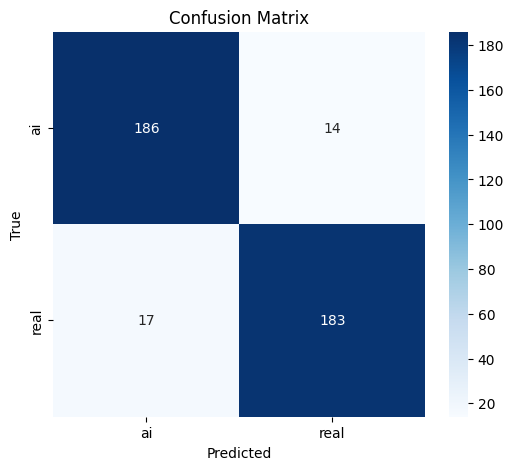

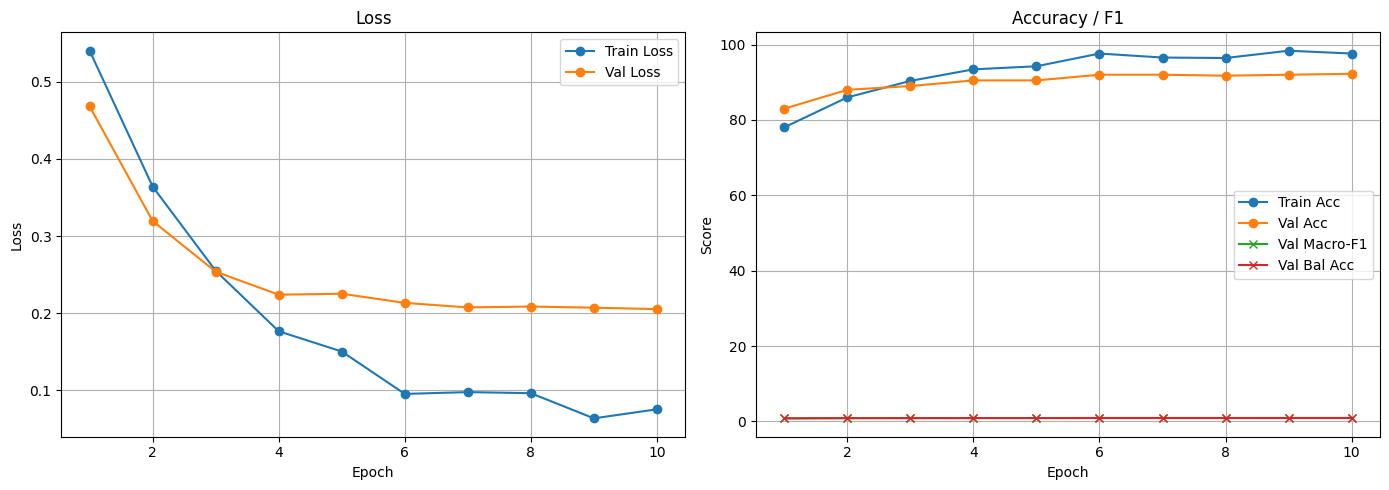

Artifacts saved under: /content/drive/MyDrive/synthbuster/checkpoints
Best model: /content/drive/MyDrive/synthbuster/checkpoints/mobilevitv2_best.pth
Last checkpoint: /content/drive/MyDrive/synthbuster/checkpoints/mobilevitv2_last.pth
History: /content/drive/MyDrive/synthbuster/checkpoints/history.pth


In [15]:
# Colab cell 5: evaluate on validation set, print classification report + confusion matrix + training plots
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device); labels = labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

classes = train_dataset.classes
print("Classes:", classes)
print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=classes))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot history saved in CSV or variable
import pandas as pd
hist = pd.read_csv(csv_log_path) if os.path.exists(csv_log_path) else pd.DataFrame(history)
epochs = hist['epoch'].tolist()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(epochs, hist['train_loss'], marker='o', label='Train Loss')
plt.plot(epochs, hist['val_loss'],   marker='o', label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epochs, hist['train_acc'], marker='o', label='Train Acc')
plt.plot(epochs, hist['val_acc'],   marker='o', label='Val Acc')
plt.plot(epochs, hist['val_macro_f1'], marker='x', label='Val Macro-F1')
plt.plot(epochs, hist['val_bal_acc'], marker='x', label='Val Bal Acc')
plt.title("Accuracy / F1")
plt.xlabel("Epoch"); plt.ylabel("Score"); plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

print("Artifacts saved under:", save_dir)
print("Best model:", best_model_path)
print("Last checkpoint:", last_checkpoint_path)
print("History:", history_path)
